In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4']
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Iris\Iris_NW_10.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4
0,5.1,NaN,1.4,0.2
1,NaN,3.0,1.4,0.2
2,4.7,3.2,NaN,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,NaN,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	14
float64		column 2	14
float64		column 3	21
float64		column 4	7


In [4]:
df.describe()

,column 1,column 2,column 3,column 4
count,136.000000,136.000000,129.000000,143.000000
mean,5.843382,3.052206,3.793798,1.200699
std,0.797376,0.430842,1.660796,0.756334
min,4.400000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.600000,2.500000


<AxesSubplot:>

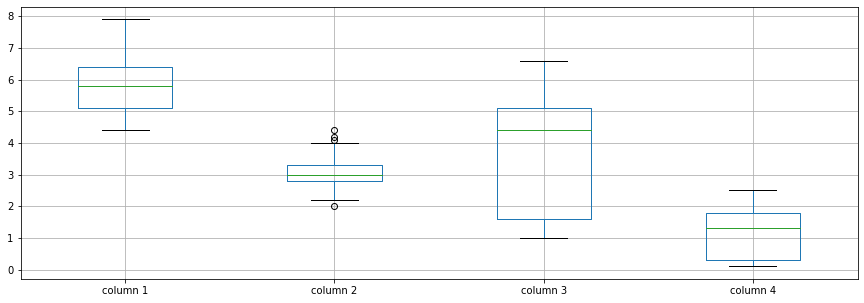

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1    5.843382
column 2    3.052206
column 3    3.793798
column 4    1.200699
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4
column 1,1.000000,-0.066018,0.840847,0.799376
column 2,-0.066018,1.000000,-0.415393,-0.337391
column 3,0.840847,-0.415393,1.000000,0.964155
column 4,0.799376,-0.337391,0.964155,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [4,4+71,4+71+71,4+71+71+71,4+71+71+71+71,4+71+71+71+71+71,4+71+71+71+71,4+71+71+71,4+71+71,4+71,4], vae_layer = False, seed = 4)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [4]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 13.067942725287544
Epoch: 1 , loss: 12.935396512349447
Epoch: 2 , loss: 12.993936644660103
Epoch: 3 , loss: 12.922293133205837
Epoch: 4 , loss: 13.030846807691786
Epoch: 5 , loss: 12.845575014750162
Epoch: 6 , loss: 12.948998981051975
Epoch: 7 , loss: 12.98497814602322
Epoch: 8 , loss: 12.94779364267985
Epoch: 9 , loss: 12.924032847086588
Epoch: 10 , loss: 12.858779165479872
Epoch: 11 , loss: 12.86652003394233
Epoch: 12 , loss: 12.72979990641276
Epoch: 13 , loss: 12.551869286431206
Epoch: 14 , loss: 12.291848500569662
Epoch: 15 , loss: 11.961831940544975
Epoch: 16 , loss: 11.670485390557182
Epoch: 17 , loss: 11.812070634629992
Epoch: 18 , loss: 11.6579286787245
Epoch: 19 , loss: 11.669973055521647
Epoch: 20 , loss: 11.241832415262857
Epoch: 21 , loss: 11.220664766099718
Epoch: 22 , loss: 11.056064499749077
Epoch: 23 , loss: 11.314769215053982
Epoch: 24 , loss: 11.311496522691515
Epoch: 25 , loss: 11.179

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(150, 4)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1    5.100000
column 2    3.700000
column 3    0.079877
column 4    0.400000
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Iris.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4
0,0.000000,-3.484656,0.000000,0.0
1,-4.853655,0.000000,0.000000,0.0
2,0.000000,0.000000,-1.220272,0.0
3,0.000000,0.000000,0.000000,0.0
4,0.000000,0.000000,0.000000,0.0
...,...,...,...,...
145,0.000000,0.000000,0.000000,0.0
146,0.000000,-1.948719,0.000000,0.0
147,0.000000,0.000000,0.000000,0.0
148,0.000000,0.000000,0.000000,0.0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(29.236384918667316, 97.653468960401)

In [17]:
NRMS=numerator/denominator
NRMS


0.2993891075238999

In [18]:
new_df.iloc[66,:]

column 1    5.6
column 2    3.0
column 3    4.5
column 4    1.5
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4
0,5.100000,0.015344,1.400000,0.2
1,0.046345,3.000000,1.400000,0.2
2,4.700000,3.200000,0.079728,0.2
3,4.600000,3.100000,1.500000,0.2
4,5.000000,3.600000,1.400000,0.2
...,...,...,...,...
145,6.700000,3.000000,5.200000,2.3
146,6.300000,0.551281,5.000000,1.9
147,6.500000,3.000000,5.200000,2.0
148,6.200000,3.400000,5.400000,2.3


In [20]:
imputations[-1].to_excel("Iris_NW_10(imp).xlsx", index=False, header=False)